# **Loading Data**

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the IMDB dataset
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Pad sequences to ensure uniform input size
maxlen = 500
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape of x_train: (25000, 500)
Shape of y_train: (25000,)


# **Model Definition**

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

def build_single_layer_model(hidden_units, activation='relu', loss_function='binary_crossentropy', dropout_rate=0.5, l2_rate=0.01):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(maxlen,)))
    model.add(layers.Embedding(input_dim=num_words, output_dim=128, input_length=maxlen))
    model.add(layers.Flatten())  # Flatten to convert 2D embeddings to 1D
    model.add(layers.Dense(hidden_units, activation=activation, kernel_regularizer=regularizers.l2(l2_rate)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

    model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])
    return model

def build_three_layer_model(hidden_units, activation='relu', loss_function='binary_crossentropy', dropout_rate=0.5, l2_rate=0.01):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(maxlen,)))
    model.add(layers.Embedding(input_dim=num_words, output_dim=128, input_length=maxlen))
    model.add(layers.Flatten())  # Flatten to convert 2D embeddings to 1D
    model.add(layers.Dense(hidden_units, activation=activation, kernel_regularizer=regularizers.l2(l2_rate)))
    model.add(layers.Dense(hidden_units, activation=activation, kernel_regularizer=regularizers.l2(l2_rate)))
    model.add(layers.Dense(hidden_units, activation=activation, kernel_regularizer=regularizers.l2(l2_rate)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

    model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])
    return model

# **Model Training**

In [3]:
import pandas as pd

def train_and_evaluate(models_config, model_type):
    results = []
    for config in models_config:
        model = config['model'](*config['args'], **config['kwargs'])
        model.summary()
        history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

        # Collect results
        results.append({
            'model_type': model_type,
            'hidden_units': config['args'][0],
            'activation': config['kwargs'].get('activation'),
            'loss_function': config['kwargs'].get('loss_function'),
            'train_accuracy': max(history.history['accuracy']),
            'val_accuracy': max(history.history['val_accuracy']),
        })

    return pd.DataFrame(results)

# Define configurations
hidden_units_list = [32, 64, 128]
activation_functions = ['relu', 'tanh']
loss_functions = ['binary_crossentropy', 'mean_squared_error']

# Single-layer models
single_layer_configs = []
for units in hidden_units_list:
    for activation in activation_functions:
        for loss_function in loss_functions:
            single_layer_configs.append({
                'model': build_single_layer_model,
                'args': [units],
                'kwargs': {'activation': activation, 'loss_function': loss_function, 'dropout_rate': 0.5, 'l2_rate': 0.01}
            })

# Three-layer models
three_layer_configs = []
for units in hidden_units_list:
    for activation in activation_functions:
        for loss_function in loss_functions:
            three_layer_configs.append({
                'model': build_three_layer_model,
                'args': [units],
                'kwargs': {'activation': activation, 'loss_function': loss_function, 'dropout_rate': 0.5, 'l2_rate': 0.01}
            })

# Train and store results
single_layer_results = train_and_evaluate(single_layer_configs, 'single_layer')
three_layer_results = train_and_evaluate(three_layer_configs, 'three_layer')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │       2,048,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,328,065 (12.70 MB)

 Trainable params: 3,328,065 (12.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6240 - loss: 0.8473 - val_accuracy: 0.8330 - val_loss: 0.7101
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8826 - loss: 0.6654 - val_accuracy: 0.8612 - val_loss: 0.7893
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9169 - loss: 0.6558 - val_accuracy: 0.8672 - val_loss: 0.7849
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9377 - loss: 0.6632 - val_accuracy: 0.8568 - val_loss: 0.9775
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9577 - loss: 0.6236 - val_accuracy: 0.8610 - val_loss: 1.0044
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9652 - loss: 0.6662 - val_accuracy: 0.8542 - val_loss: 1.0082
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9759 - loss: 0.6164 - val_accuracy: 0.8482 - val_loss: 1.1438
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9748 - loss: 0.6946 - val_accuracy: 0.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │       2,048,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,328,065 (12.70 MB)

 Trainable params: 3,328,065 (12.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6251 - loss: 0.3255 - val_accuracy: 0.8460 - val_loss: 0.2689
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8644 - loss: 0.2729 - val_accuracy: 0.8494 - val_loss: 0.2886
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8934 - loss: 0.2739 - val_accuracy: 0.8664 - val_loss: 0.3331
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9071 - loss: 0.2783 - val_accuracy: 0.8548 - val_loss: 0.4083
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9165 - loss: 0.2920 - val_accuracy: 0.8334 - val_loss: 0.4002
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9246 - loss: 0.2997 - val_accuracy: 0.8518 - val_loss: 0.3433
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9283 - loss: 0.2980 - val_accuracy: 0.8474 - val_loss: 0.3926
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9446 - loss: 0.2984 - val_accuracy: 0.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │       2,048,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,328,065 (12.70 MB)

 Trainable params: 3,328,065 (12.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7027 - loss: 0.8580 - val_accuracy: 0.8540 - val_loss: 0.7562
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8991 - loss: 0.6625 - val_accuracy: 0.8668 - val_loss: 0.8263
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9425 - loss: 0.5922 - val_accuracy: 0.8528 - val_loss: 1.0909
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9642 - loss: 0.5937 - val_accuracy: 0.8592 - val_loss: 0.9061
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9767 - loss: 0.5323 - val_accuracy: 0.8178 - val_loss: 1.6674
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9729 - loss: 0.7865 - val_accuracy: 0.8368 - val_loss: 1.0676
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9813 - loss: 0.6017 - val_accuracy: 0.8552 - val_loss: 1.0314
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9812 - loss: 0.6165 - val_accuracy: 0.

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │       2,048,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,328,065 (12.70 MB)

 Trainable params: 3,328,065 (12.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6781 - loss: 0.3664 - val_accuracy: 0.8496 - val_loss: 0.2910
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8779 - loss: 0.2750 - val_accuracy: 0.8632 - val_loss: 0.3190
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9062 - loss: 0.2812 - val_accuracy: 0.8526 - val_loss: 0.3461
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9280 - loss: 0.2855 - val_accuracy: 0.8516 - val_loss: 0.3219
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9448 - loss: 0.2726 - val_accuracy: 0.8522 - val_loss: 0.3271
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9502 - loss: 0.2888 - val_accuracy: 0.8622 - val_loss: 0.3296
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9630 - loss: 0.2558 - val_accuracy: 0.8454 - val_loss: 0.4344
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9601 - loss: 0.3043 - val_accuracy: 0.

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │       4,096,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,376,129 (20.51 MB)

 Trainable params: 5,376,129 (20.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6457 - loss: 0.9368 - val_accuracy: 0.8486 - val_loss: 0.7823
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8826 - loss: 0.7533 - val_accuracy: 0.8392 - val_loss: 0.8766
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9110 - loss: 0.7590 - val_accuracy: 0.8576 - val_loss: 1.1006
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9437 - loss: 0.7417 - val_accuracy: 0.8396 - val_loss: 1.1196
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9555 - loss: 0.7542 - val_accuracy: 0.8602 - val_loss: 1.1512
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9684 - loss: 0.7094 - val_accuracy: 0.8524 - val_loss: 1.2076
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9768 - loss: 0.6916 - val_accuracy: 0.8496 - val_loss: 1.3549
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9778 - loss: 0.7510 - val_accuracy: 0.

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │       4,096,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,376,129 (20.51 MB)

 Trainable params: 5,376,129 (20.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6691 - loss: 0.4116 - val_accuracy: 0.8490 - val_loss: 0.3415
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8713 - loss: 0.3236 - val_accuracy: 0.8480 - val_loss: 0.3621
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8951 - loss: 0.3390 - val_accuracy: 0.8646 - val_loss: 0.3441
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9107 - loss: 0.3412 - val_accuracy: 0.8666 - val_loss: 0.4443
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9252 - loss: 0.3462 - val_accuracy: 0.8612 - val_loss: 0.4714
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9310 - loss: 0.3695 - val_accuracy: 0.8454 - val_loss: 0.4461
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9413 - loss: 0.3705 - val_accuracy: 0.8500 - val_loss: 0.4440
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9493 - loss: 0.3567 - val_accuracy: 0.

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │       4,096,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,376,129 (20.51 MB)

 Trainable params: 5,376,129 (20.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7003 - loss: 1.0175 - val_accuracy: 0.8420 - val_loss: 0.9901
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8905 - loss: 0.7987 - val_accuracy: 0.8426 - val_loss: 0.9662
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9367 - loss: 0.7292 - val_accuracy: 0.8484 - val_loss: 1.1469
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9569 - loss: 0.7360 - val_accuracy: 0.8474 - val_loss: 1.2975
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9717 - loss: 0.7586 - val_accuracy: 0.8472 - val_loss: 1.2780
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9763 - loss: 0.7420 - val_accuracy: 0.8534 - val_loss: 1.3253
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9828 - loss: 0.6885 - val_accuracy: 0.8498 - val_loss: 1.3680
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9782 - loss: 0.8148 - val_accuracy: 0.

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │       4,096,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,376,129 (20.51 MB)

 Trainable params: 5,376,129 (20.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6969 - loss: 0.4386 - val_accuracy: 0.8340 - val_loss: 0.3499
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8763 - loss: 0.3311 - val_accuracy: 0.8548 - val_loss: 0.3973
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9003 - loss: 0.3417 - val_accuracy: 0.8374 - val_loss: 0.4301
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9192 - loss: 0.3342 - val_accuracy: 0.8232 - val_loss: 0.4581
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9286 - loss: 0.3382 - val_accuracy: 0.8514 - val_loss: 0.4322
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9422 - loss: 0.3435 - val_accuracy: 0.8460 - val_loss: 0.3951
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9548 - loss: 0.3167 - val_accuracy: 0.8422 - val_loss: 0.4594
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9571 - loss: 0.3353 - val_accuracy: 0.

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │       8,192,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,472,257 (36.13 MB)

 Trainable params: 9,472,257 (36.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6597 - loss: 1.1435 - val_accuracy: 0.8432 - val_loss: 0.9450
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8828 - loss: 0.9508 - val_accuracy: 0.8380 - val_loss: 1.1946
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9114 - loss: 1.0006 - val_accuracy: 0.8476 - val_loss: 1.3515
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9360 - loss: 0.9744 - val_accuracy: 0.8656 - val_loss: 1.3480
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9530 - loss: 0.9774 - val_accuracy: 0.8530 - val_loss: 1.3104
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9670 - loss: 0.8669 - val_accuracy: 0.8474 - val_loss: 1.6241
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9700 - loss: 0.9505 - val_accuracy: 0.8528 - val_loss: 1.3827
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9714 - loss: 0.9665 - val_accuracy: 0.

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │       8,192,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,472,257 (36.13 MB)

 Trainable params: 9,472,257 (36.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6555 - loss: 0.5143 - val_accuracy: 0.8208 - val_loss: 0.4045
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8623 - loss: 0.4190 - val_accuracy: 0.8492 - val_loss: 0.4736
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8893 - loss: 0.4328 - val_accuracy: 0.8522 - val_loss: 0.5703
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9052 - loss: 0.4446 - val_accuracy: 0.8414 - val_loss: 0.5068
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9160 - loss: 0.4409 - val_accuracy: 0.8548 - val_loss: 0.5093
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9210 - loss: 0.4676 - val_accuracy: 0.8464 - val_loss: 0.5504
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9362 - loss: 0.4188 - val_accuracy: 0.8532 - val_loss: 0.4659
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9413 - loss: 0.4502 - val_accuracy: 0.

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)             │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │       8,192,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,472,257 (36.13 MB)

 Trainable params: 9,472,257 (36.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6968 - loss: 1.2297 - val_accuracy: 0.8470 - val_loss: 0.9787
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8863 - loss: 0.9661 - val_accuracy: 0.8512 - val_loss: 1.0514
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9245 - loss: 0.8595 - val_accuracy: 0.8440 - val_loss: 1.2587
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9533 - loss: 0.8345 - val_accuracy: 0.8522 - val_loss: 1.3252
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9700 - loss: 0.7698 - val_accuracy: 0.8428 - val_loss: 1.3927
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9697 - loss: 0.8921 - val_accuracy: 0.8532 - val_loss: 1.5130
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9778 - loss: 0.8096 - val_accuracy: 0.8366 - val_loss: 1.9993
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9771 - loss: 1.0100 - val_accuracy: 0.

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)             │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │       8,192,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,472,257 (36.13 MB)

 Trainable params: 9,472,257 (36.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6823 - loss: 0.5578 - val_accuracy: 0.8368 - val_loss: 0.3989
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8632 - loss: 0.4180 - val_accuracy: 0.8288 - val_loss: 0.4599
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8915 - loss: 0.4283 - val_accuracy: 0.8430 - val_loss: 0.5295
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9135 - loss: 0.3942 - val_accuracy: 0.8526 - val_loss: 0.4700
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9305 - loss: 0.3807 - val_accuracy: 0.8336 - val_loss: 0.4697
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9305 - loss: 0.3989 - val_accuracy: 0.8416 - val_loss: 0.4749
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9537 - loss: 0.3711 - val_accuracy: 0.8626 - val_loss: 0.5254
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9603 - loss: 0.3522 - val_accuracy: 0.

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)             │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 32)                  │       2,048,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,330,177 (12.70 MB)

 Trainable params: 3,330,177 (12.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5038 - loss: 1.0221 - val_accuracy: 0.4938 - val_loss: 0.6946
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4982 - loss: 0.6938 - val_accuracy: 0.5062 - val_loss: 0.6931
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5006 - loss: 0.6931 - val_accuracy: 0.5062 - val_loss: 0.6931
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4943 - loss: 0.6933 - val_accuracy: 0.4938 - val_loss: 0.6932
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5077 - loss: 0.6931 - val_accuracy: 0.4938 - val_loss: 0.6932
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4924 - loss: 0.6932 - val_accuracy: 0.4938 - val_loss: 0.6932
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5050 - loss: 0.6931 - val_accuracy: 0.4938 - val_loss: 0.6931
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4975 - loss: 0.6932 - val_accuracy: 0.

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)             │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 32)                  │       2,048,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,330,177 (12.70 MB)

 Trainable params: 3,330,177 (12.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4982 - loss: 0.5365 - val_accuracy: 0.4938 - val_loss: 0.2502
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4959 - loss: 0.2501 - val_accuracy: 0.4938 - val_loss: 0.2500
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5020 - loss: 0.2500 - val_accuracy: 0.5062 - val_loss: 0.2500
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5024 - loss: 0.2500 - val_accuracy: 0.4938 - val_loss: 0.2500
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5023 - loss: 0.2500 - val_accuracy: 0.4938 - val_loss: 0.2500
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4974 - loss: 0.2500 - val_accuracy: 0.4938 - val_loss: 0.2501
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5041 - loss: 0.2500 - val_accuracy: 0.4938 - val_loss: 0.2500
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5023 - loss: 0.2500 - val_accuracy: 0.

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)             │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 32)                  │       2,048,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,330,177 (12.70 MB)

 Trainable params: 3,330,177 (12.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6800 - loss: 1.2108 - val_accuracy: 0.8562 - val_loss: 0.5731
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9099 - loss: 0.4804 - val_accuracy: 0.8630 - val_loss: 0.5547
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9624 - loss: 0.3318 - val_accuracy: 0.8562 - val_loss: 0.6196
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9907 - loss: 0.2266 - val_accuracy: 0.8548 - val_loss: 0.6099
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9923 - loss: 0.2066 - val_accuracy: 0.8566 - val_loss: 0.8022
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9952 - loss: 0.2139 - val_accuracy: 0.8528 - val_loss: 0.5644
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9973 - loss: 0.1367 - val_accuracy: 0.8508 - val_loss: 0.6516
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9973 - loss: 0.1504 - val_accuracy: 0.

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)             │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 32)                  │       2,048,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,330,177 (12.70 MB)

 Trainable params: 3,330,177 (12.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6241 - loss: 0.6264 - val_accuracy: 0.8502 - val_loss: 0.2057
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8859 - loss: 0.1877 - val_accuracy: 0.8610 - val_loss: 0.1916
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9202 - loss: 0.1583 - val_accuracy: 0.8714 - val_loss: 0.1897
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9480 - loss: 0.1311 - val_accuracy: 0.8642 - val_loss: 0.1663
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9692 - loss: 0.1025 - val_accuracy: 0.8602 - val_loss: 0.1672
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9838 - loss: 0.0797 - val_accuracy: 0.8626 - val_loss: 0.1833
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9893 - loss: 0.0767 - val_accuracy: 0.8586 - val_loss: 0.1539
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9937 - loss: 0.0677 - val_accuracy: 0.

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)             │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 64)                  │       4,096,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,384,449 (20.54 MB)

 Trainable params: 5,384,449 (20.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5084 - loss: 1.2521 - val_accuracy: 0.4938 - val_loss: 0.6938
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4977 - loss: 0.6935 - val_accuracy: 0.5062 - val_loss: 0.6931
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5039 - loss: 0.6932 - val_accuracy: 0.5062 - val_loss: 0.6931
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4999 - loss: 0.6932 - val_accuracy: 0.5062 - val_loss: 0.6931
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4980 - loss: 0.6932 - val_accuracy: 0.4938 - val_loss: 0.6932
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5059 - loss: 0.6931 - val_accuracy: 0.5062 - val_loss: 0.6931
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4923 - loss: 0.6932 - val_accuracy: 0.4938 - val_loss: 0.6932
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5007 - loss: 0.6931 - val_accuracy: 0.

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_17 (Embedding)             │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_17 (Flatten)                 │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 64)                  │       4,096,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,384,449 (20.54 MB)

 Trainable params: 5,384,449 (20.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4970 - loss: 0.6938 - val_accuracy: 0.4938 - val_loss: 0.2502
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5014 - loss: 0.2501 - val_accuracy: 0.5062 - val_loss: 0.2500
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4948 - loss: 0.2500 - val_accuracy: 0.5062 - val_loss: 0.2500
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4984 - loss: 0.2500 - val_accuracy: 0.4938 - val_loss: 0.2500
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4988 - loss: 0.2500 - val_accuracy: 0.4938 - val_loss: 0.2500
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4952 - loss: 0.2500 - val_accuracy: 0.4938 - val_loss: 0.2500
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5027 - loss: 0.2500 - val_accuracy: 0.4938 - val_loss: 0.2500
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4992 - loss: 0.2500 - val_accuracy: 0.

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_18 (Embedding)             │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_18 (Flatten)                 │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 64)                  │       4,096,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,384,449 (20.54 MB)

 Trainable params: 5,384,449 (20.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6546 - loss: 1.6058 - val_accuracy: 0.8654 - val_loss: 0.5585
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9035 - loss: 0.4820 - val_accuracy: 0.8660 - val_loss: 0.5435
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9617 - loss: 0.3341 - val_accuracy: 0.8588 - val_loss: 0.6695
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9832 - loss: 0.2922 - val_accuracy: 0.8630 - val_loss: 0.7020
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9936 - loss: 0.2174 - val_accuracy: 0.8386 - val_loss: 0.8818
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9942 - loss: 0.2178 - val_accuracy: 0.8686 - val_loss: 0.5181
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9965 - loss: 0.1752 - val_accuracy: 0.8578 - val_loss: 0.6569
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9972 - loss: 0.1678 - val_accuracy: 0.

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_19 (Embedding)             │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_19 (Flatten)                 │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 64)                  │       4,096,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,384,449 (20.54 MB)

 Trainable params: 5,384,449 (20.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6252 - loss: 0.8460 - val_accuracy: 0.8438 - val_loss: 0.2057
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8782 - loss: 0.1921 - val_accuracy: 0.8544 - val_loss: 0.1997
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9153 - loss: 0.1586 - val_accuracy: 0.8570 - val_loss: 0.1903
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9377 - loss: 0.1457 - val_accuracy: 0.8652 - val_loss: 0.2010
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9624 - loss: 0.1388 - val_accuracy: 0.8664 - val_loss: 0.2540
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9731 - loss: 0.1229 - val_accuracy: 0.8694 - val_loss: 0.1732
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9846 - loss: 0.0927 - val_accuracy: 0.8674 - val_loss: 0.2131
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9823 - loss: 0.1146 - val_accuracy: 0.

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_20 (Embedding)             │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_20 (Flatten)                 │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 128)                 │       8,192,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,505,281 (36.26 MB)

 Trainable params: 9,505,281 (36.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5007 - loss: 1.5311 - val_accuracy: 0.4938 - val_loss: 0.6933
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4945 - loss: 0.6933 - val_accuracy: 0.4938 - val_loss: 0.6933
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4976 - loss: 0.6933 - val_accuracy: 0.4938 - val_loss: 0.6932
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5057 - loss: 0.6932 - val_accuracy: 0.5062 - val_loss: 0.6931
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5035 - loss: 0.6931 - val_accuracy: 0.4938 - val_loss: 0.6932
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5027 - loss: 0.6932 - val_accuracy: 0.4938 - val_loss: 0.6932
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4974 - loss: 0.6932 - val_accuracy: 0.5062 - val_loss: 0.6931
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4951 - loss: 0.6932 - val_accuracy: 0.

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_21 (Embedding)             │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_21 (Flatten)                 │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 128)                 │       8,192,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,505,281 (36.26 MB)

 Trainable params: 9,505,281 (36.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5010 - loss: 0.9715 - val_accuracy: 0.4938 - val_loss: 0.2500
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4985 - loss: 0.2500 - val_accuracy: 0.4938 - val_loss: 0.2500
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4959 - loss: 0.2500 - val_accuracy: 0.4938 - val_loss: 0.2500
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4980 - loss: 0.2500 - val_accuracy: 0.4938 - val_loss: 0.2500
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4945 - loss: 0.2500 - val_accuracy: 0.4938 - val_loss: 0.2500
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5002 - loss: 0.2500 - val_accuracy: 0.4938 - val_loss: 0.2500
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4903 - loss: 0.2500 - val_accuracy: 0.4938 - val_loss: 0.2500
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4981 - loss: 0.2500 - val_accuracy: 0.

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_22 (Embedding)             │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_22 (Flatten)                 │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 128)                 │       8,192,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,505,281 (36.26 MB)

 Trainable params: 9,505,281 (36.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6417 - loss: 2.1878 - val_accuracy: 0.8306 - val_loss: 0.6339
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8987 - loss: 0.5138 - val_accuracy: 0.8624 - val_loss: 0.6116
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9553 - loss: 0.3910 - val_accuracy: 0.8444 - val_loss: 0.9131
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9863 - loss: 0.3096 - val_accuracy: 0.8562 - val_loss: 0.7448
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9935 - loss: 0.2395 - val_accuracy: 0.8648 - val_loss: 0.7216
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9962 - loss: 0.2314 - val_accuracy: 0.8614 - val_loss: 0.5756
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9983 - loss: 0.1309 - val_accuracy: 0.8592 - val_loss: 0.7297
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9918 - loss: 0.4637 - val_accuracy: 0.

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_23 (Embedding)             │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_23 (Flatten)                 │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 128)                 │       8,192,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,505,281 (36.26 MB)

 Trainable params: 9,505,281 (36.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5105 - loss: 1.1586 - val_accuracy: 0.4938 - val_loss: 0.2501
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4993 - loss: 0.2502 - val_accuracy: 0.4938 - val_loss: 0.2500
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4952 - loss: 0.2502 - val_accuracy: 0.5062 - val_loss: 0.2500
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4993 - loss: 0.2502 - val_accuracy: 0.5062 - val_loss: 0.2500
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4937 - loss: 0.2502 - val_accuracy: 0.4938 - val_loss: 0.2501
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5008 - loss: 0.2501 - val_accuracy: 0.4938 - val_loss: 0.2503
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4998 - loss: 0.2501 - val_accuracy: 0.4938 - val_loss: 0.2500
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5082 - loss: 0.2500 - val_accuracy: 0.

In [4]:
print("Single Layer Results")
single_layer_results

Single Layer Results


,model_type,hidden_units,activation,loss_function,train_accuracy,val_accuracy
0,single_layer,32,relu,binary_crossentropy,0.98005,0.8672
1,single_layer,32,relu,mean_squared_error,0.95220,0.8664
2,single_layer,32,tanh,binary_crossentropy,0.98445,0.8668
3,single_layer,32,tanh,mean_squared_error,0.96965,0.8632
4,single_layer,64,relu,binary_crossentropy,0.97870,0.8602
5,single_layer,64,relu,mean_squared_error,0.95890,0.8666
6,single_layer,64,tanh,binary_crossentropy,0.98555,0.8600
7,single_layer,64,tanh,mean_squared_error,0.96400,0.8548
8,single_layer,128,relu,binary_crossentropy,0.97650,0.8656
9,single_layer,128,relu,mean_squared_error,0.95205,0.8550


In [17]:
print("Three Layer Results")
three_layer_results

Three Layer Results


,model_type,hidden_units,activation,loss_function,train_accuracy,val_accuracy
0,three_layer,32,relu,binary_crossentropy,0.50155,0.5062
1,three_layer,32,relu,mean_squared_error,0.50135,0.5062
2,three_layer,32,tanh,binary_crossentropy,0.99760,0.8630
3,three_layer,32,tanh,mean_squared_error,0.99145,0.8714
4,three_layer,64,relu,binary_crossentropy,0.50405,0.5062
5,three_layer,64,relu,mean_squared_error,0.50195,0.5062
6,three_layer,64,tanh,binary_crossentropy,0.99660,0.8686
7,three_layer,64,tanh,mean_squared_error,0.98850,0.8694
8,three_layer,128,relu,binary_crossentropy,0.50400,0.5062
9,three_layer,128,relu,mean_squared_error,0.50255,0.4938


# **Results Visualization**

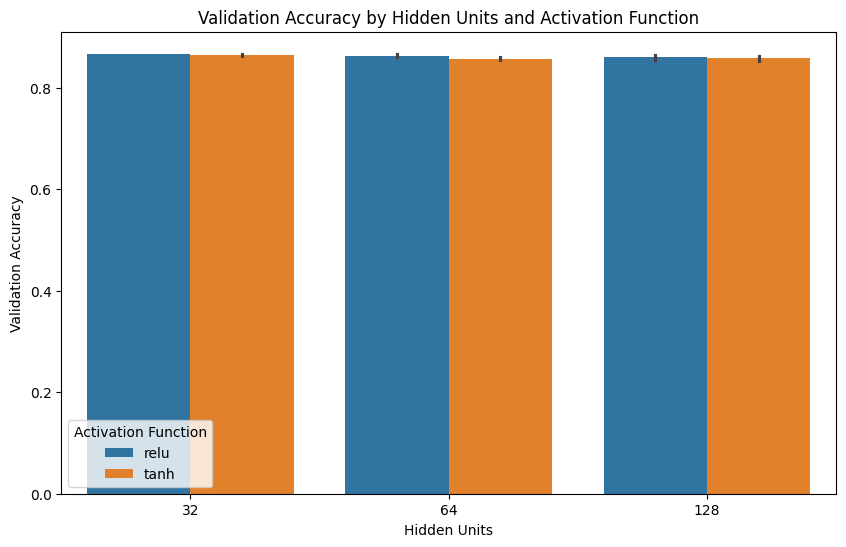

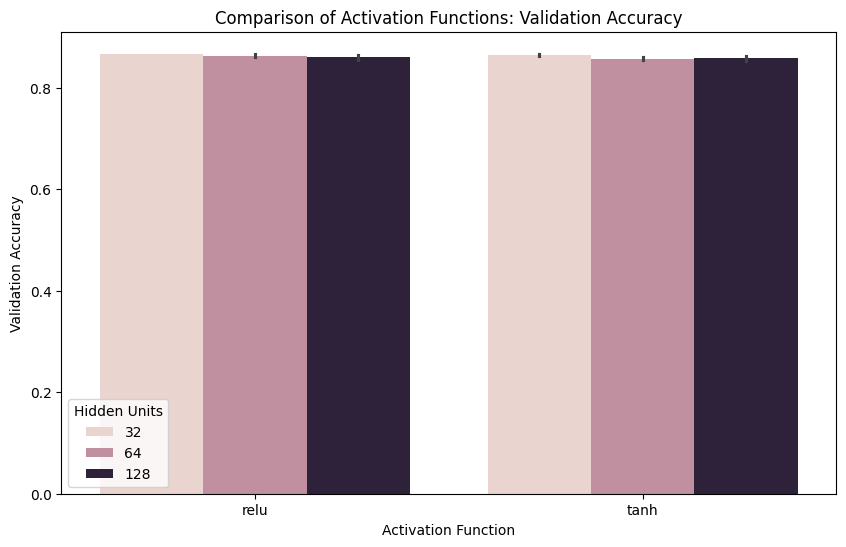

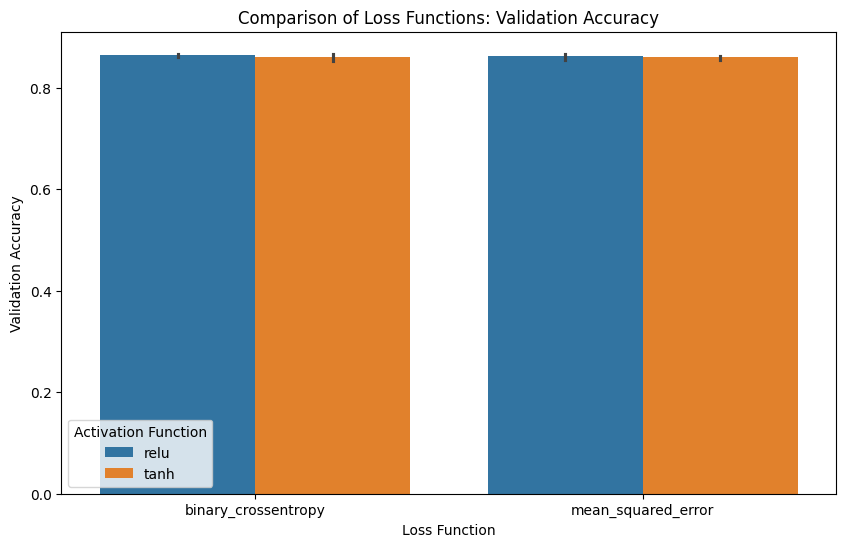

In [9]:
import seaborn as sns

df = single_layer_results

# 1. Bar Plot: Validation Accuracy by Hidden Units
plt.figure(figsize=(10, 6))
sns.barplot(x='hidden_units', y='val_accuracy', hue='activation', data=df)
plt.title('Validation Accuracy by Hidden Units and Activation Function')
plt.xlabel('Hidden Units')
plt.ylabel('Validation Accuracy')
plt.legend(title='Activation Function')
plt.show()

# 2. Bar Plot: Comparison of Activation Functions
plt.figure(figsize=(10, 6))
sns.barplot(x='activation', y='val_accuracy', hue='hidden_units', data=df)
plt.title('Comparison of Activation Functions: Validation Accuracy')
plt.xlabel('Activation Function')
plt.ylabel('Validation Accuracy')
plt.legend(title='Hidden Units')
plt.show()

# 3. Bar Plot: Comparison of Loss Functions
plt.figure(figsize=(10, 6))
sns.barplot(x='loss_function', y='val_accuracy', hue='activation', data=df)
plt.title('Comparison of Loss Functions: Validation Accuracy')
plt.xlabel('Loss Function')
plt.ylabel('Validation Accuracy')
plt.legend(title='Activation Function')
plt.show()

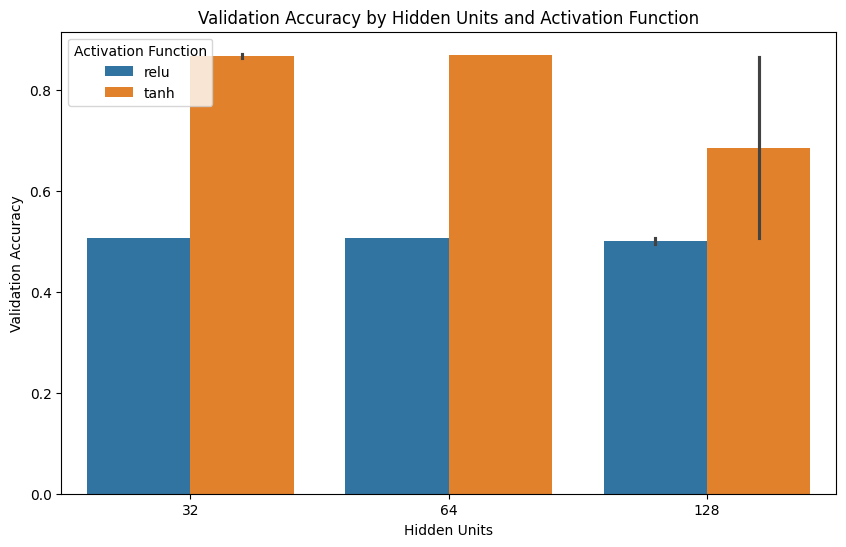

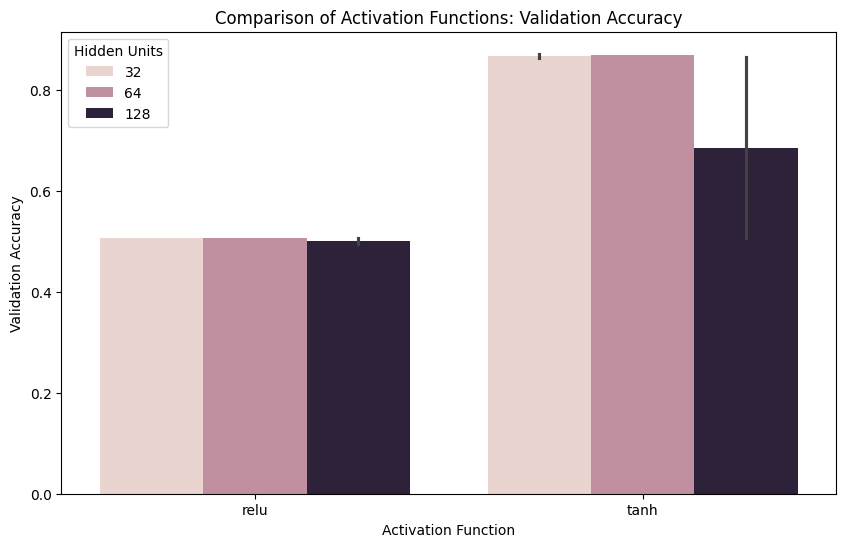

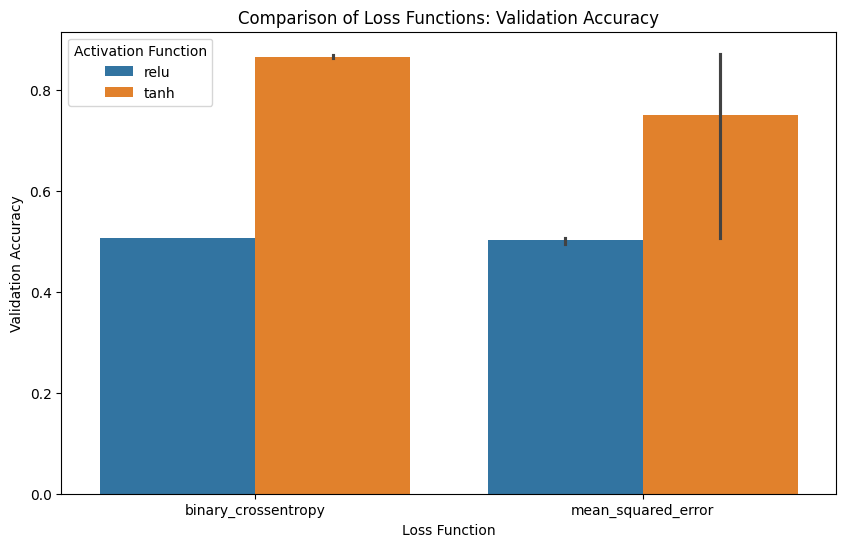

In [10]:
df = three_layer_results

# 1. Bar Plot: Validation Accuracy by Hidden Units
plt.figure(figsize=(10, 6))
sns.barplot(x='hidden_units', y='val_accuracy', hue='activation', data=df)
plt.title('Validation Accuracy by Hidden Units and Activation Function')
plt.xlabel('Hidden Units')
plt.ylabel('Validation Accuracy')
plt.legend(title='Activation Function')
plt.show()

# 2. Bar Plot: Comparison of Activation Functions
plt.figure(figsize=(10, 6))
sns.barplot(x='activation', y='val_accuracy', hue='hidden_units', data=df)
plt.title('Comparison of Activation Functions: Validation Accuracy')
plt.xlabel('Activation Function')
plt.ylabel('Validation Accuracy')
plt.legend(title='Hidden Units')
plt.show()

# 3. Bar Plot: Comparison of Loss Functions
plt.figure(figsize=(10, 6))
sns.barplot(x='loss_function', y='val_accuracy', hue='activation', data=df)
plt.title('Comparison of Loss Functions: Validation Accuracy')
plt.xlabel('Loss Function')
plt.ylabel('Validation Accuracy')
plt.legend(title='Activation Function')
plt.show()

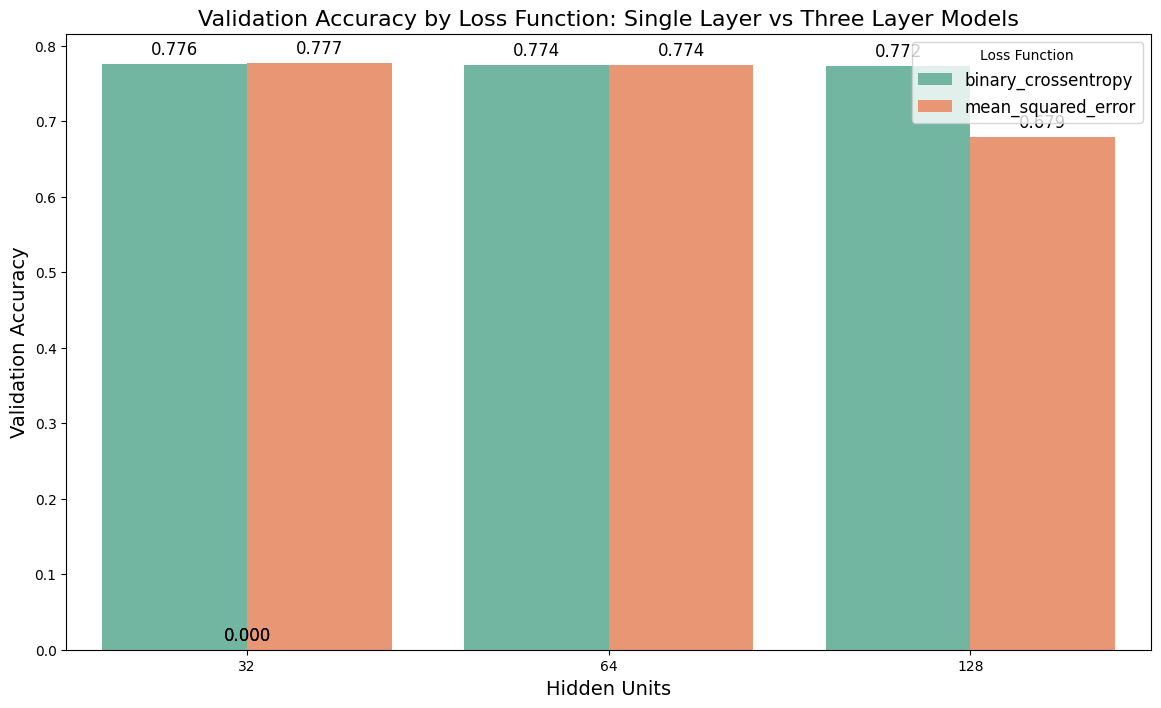

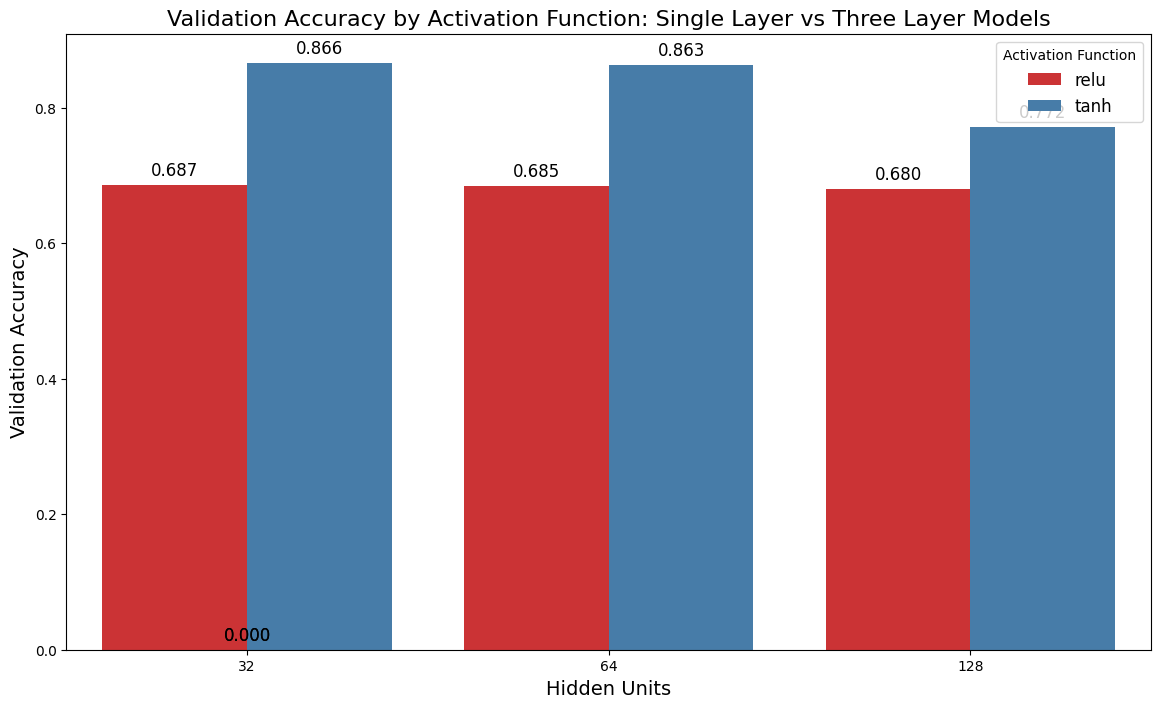

In [16]:
# Combine both results into a single DataFrame
combined_results = pd.concat([single_layer_results, three_layer_results])

#  Comparison of loss functions within each model type
plt.figure(figsize=(14, 8))

# Grouped barplot for validation accuracy by loss function
sns.barplot(x='hidden_units', y='val_accuracy', hue='loss_function', data=combined_results, palette="Set2", errorbar=None)

# Annotate each bar with the value
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.3f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='baseline', fontsize=12, color='black', rotation=0, xytext=(0, 7),
                       textcoords='offset points')

# Adding titles and labels
plt.title('Validation Accuracy by Loss Function: Single Layer vs Three Layer Models', fontsize=16)
plt.xlabel('Hidden Units', fontsize=14)
plt.ylabel('Validation Accuracy', fontsize=14)
plt.legend(title='Loss Function', fontsize=12)

# Show the plot
plt.show()

plt.figure(figsize=(14, 8))

# Grouped barplot for validation accuracy by activation function
sns.barplot(x='hidden_units', y='val_accuracy', hue='activation', data=combined_results, palette="Set1", errorbar=None)

# Annotate each bar with the value
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.3f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='baseline', fontsize=12, color='black', rotation=0, xytext=(0, 7),
                       textcoords='offset points')

# Adding titles and labels
plt.title('Validation Accuracy by Activation Function: Single Layer vs Three Layer Models', fontsize=16)
plt.xlabel('Hidden Units', fontsize=14)
plt.ylabel('Validation Accuracy', fontsize=14)
plt.legend(title='Activation Function', fontsize=12)

# Show the plot
plt.show()
